<a href="https://colab.research.google.com/github/bich1970/DailyCovTracking2020/blob/master/Copy_of_Covid_19_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
# Updates on Covid-19 cases

#by Bushara Sagr

 
**### Data source:** 



---


Johns-hopkins-covid-19 free dataset from github 'a software development platform'.
read full story of this most vistid and trusted data here:
https://edition.cnn.com/2020/07/11/health/johns-hopkins-covid-19-map-team-wellness-trnd/index.html

## original code source of this presentation from article puplished in https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6 , with adjustment to fulfill the needs of this presentation.

**# Data processing and visualizing Tools:**


---


###  -python coding environment:
###  - pandas and Numpy liberary for processing and preparing dataset
###  - wget python liberrary to get raw data
###  -seaborn- for Geaplotting Graph
###  - Altair as main data visualization tool

**### Code Environment:**


---


###  - Google colab notebook 


### **key analytics:**


---



**Variables:**


   - Total Confirmed cases
   - daily new cases
   - daily new deaths
   -daily recoveries
  
**Targets:**
   - KSA Cases trends
   -top 4 countries by # of confirmed cases
   - Arab states trends
   - Selected countries trends
   - Selected  states trends 



      

**# Preparing and processing the Data**

# Preparing and processing the Data

---



In [1]:

!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=61ad57633a5878ce01424bd9d2a71a77f840add95b6eaf6afa3cb174fa471b39
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
 ## importing required libraries
import pandas as pd
import numpy as np
import altair as alt
import wget
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map

In [3]:
#importing dataset from john-hopkins github site url:
 
urls = [
    
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
 
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

In [4]:
 
 
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [5]:
 
 
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [6]:
 
 
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864,1874,1900,1906,1919,1935,1945,1956,1965,1969,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,623,631,637,646,657,672,685,699,716,735,743,753,771,787,798,810,822,839,852,870,889,905,922,936,951,965,977,989,1003,1016,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501,2516,2527,2539,2554,2564,2575,2584,2596,2609,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,81,81,82,82,83
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,322,324,328,332,333,334,336,337,337,338,340,341,342,345,346,348,350,351,352,353,354,354,354,355,358,362,365,366,371,372,372,379,382,384,386,387,390,393,393,393


In [7]:
 
 
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35092,35137,35160,35295,35350,35370,35422,35934,35976,36122,36145,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099,38141,38200,38250,38252,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12889,13453,13804,14216,14565,15055,15469,15842,16230,16666,17031,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609,24136,24520,24820,24820,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,44633,45148,45148,46326,46962,47581,48183,48794,49421,50070,50712,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135,59590,60028,60457,60888,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4747,4830,4965,5055,5127,5239,5290,5358,5405,5503,5542,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505,6598,6629,6629,6706,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6444,6523,6582,6623,7062,7117,7273,7346,7351,7444,7517,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679,8798,8841,8898,8924,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [8]:
 
 
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/15/20', '12/16/20', '12/17/20', '12/18/20', '12/19/20', '12/20/20',
       '12/21/20', '12/22/20', '12/23/20', '12/24/20'],
      dtype='object', length=342)

In [9]:
 
 
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/15/20', '12/16/20', '12/17/20', '12/18/20', '12/19/20', '12/20/20',
       '12/21/20', '12/22/20', '12/23/20', '12/24/20'],
      dtype='object', length=342)

In [10]:
 
 
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/15/20', '12/16/20', '12/17/20', '12/18/20', '12/19/20', '12/20/20',
       '12/21/20', '12/22/20', '12/23/20', '12/24/20'],
      dtype='object', length=342)

In [11]:
 
 
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [12]:
 
 
confirmed_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [13]:
 
 
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [14]:
 
 
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [15]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [16]:
 
 
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [17]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [18]:
 
 
full_table.isna().sum()

Province/State    63544
Country/Region        0
Lat                 338
Long                338
Date                  0
Confirmed             0
Deaths                0
Recovered          7098
dtype: int64

In [19]:
 
 
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [20]:
 
 
full_table.isna().sum()

Province/State    63544
Country/Region        0
Lat                 338
Long                338
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [21]:
 
 
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

In [22]:
 
 
full_table = full_table[~(ship_rows)]

In [23]:
 
 
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [24]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,0.0


In [25]:
 
 
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [26]:
 
 
full_grouped.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0


In [27]:
 
 
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [28]:
 
 
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [29]:
#reading prepared data sa CSV file
 
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

In [51]:
last_data = full_grouped[full_grouped['Date']=='2020-12-24']
last_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
63693,63693,2020-12-24,Afghanistan,50655,2126,40359.0,8170.0,222,9,667
63694,63694,2020-12-24,Albania,54827,1125,30276.0,23426.0,510,8,477
63695,63695,2020-12-24,Algeria,97007,2705,64777.0,29525.0,458,9,376
63696,63696,2020-12-24,Andorra,7699,83,7171.0,445.0,30,1,65
63697,63697,2020-12-24,Angola,17029,393,9729.0,6907.0,98,0,0
...,...,...,...,...,...,...,...,...,...,...
63877,63877,2020-12-24,Vietnam,1432,35,1281.0,116.0,11,0,0
63878,63878,2020-12-24,West Bank and Gaza,129080,1243,105233.0,22604.0,1704,17,2291
63879,63879,2020-12-24,Yemen,2092,606,1384.0,102.0,5,0,0
63880,63880,2020-12-24,Zambia,19234,381,18036.0,817.0,112,1,67


In [52]:
world = last_data.groupby(['Country/Region'])[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
world.head(5)

,Country/Region,Confirmed,Active,Recovered,Deaths
0,Afghanistan,50655,8170.0,40359.0,2126
1,Albania,54827,23426.0,30276.0,1125
2,Algeria,97007,29525.0,64777.0,2705
3,Andorra,7699,445.0,7171.0,83
4,Angola,17029,6907.0,9729.0,393


#Current disease spreading Map

---



In [53]:
#Covid-19 spreading map across nations 
figure = px.choropleth(world,locations='Country/Region', 
locationmode='country names', color='Confirmed',
hover_name='Country/Region', color_continuous_scale='tealgrn', range_color=
[1,1000000],title='Covid-19 spreading map across nations by total number of confirmed cases')
figure.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



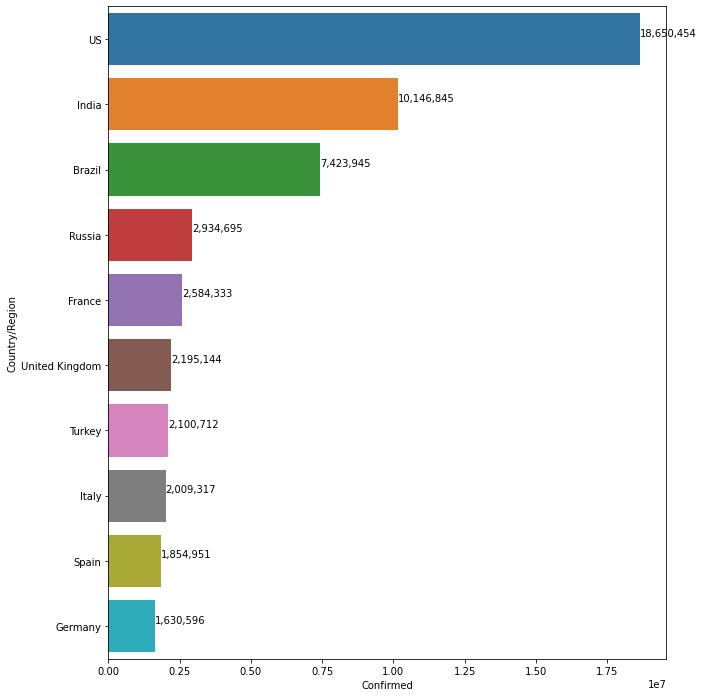

In [54]:
# top 5 states by Number of total confirmed cases

top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(10)
### Generate a Barplot
plt.figure(figsize=(10,12))
plot = sns.barplot(top_20['Confirmed'], top_20['Country/Region'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [34]:
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
thesecountries = ['US','Brazil','India','Russia']
trending_countries = full_grouped[full_grouped['Country/Region'].isin(thesecountries)]

In [35]:
brush = alt.selection(type='interval')
 
points = alt.Chart(trending_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
).properties(title='Trending Countries per # of confirmed Cases')
 
bars = alt.Chart(trending_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

alt.VConcatChart(...)

In [36]:

full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland','Brazil','India','Russia','South Africa','Mexico']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [37]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)
 
bars = alt.Chart(selected_countries).mark_bar(size=15).encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

alt.VConcatChart(...)

# Total Confirmed vs total Deaths:

---



In [38]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
Saudia = full_grouped[full_grouped['Country/Region'] == 'Saudi Arabia']
Saudia

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
147,147,2020-01-22,Saudi Arabia,0,0,0.0,0.0,0,0,0
336,336,2020-01-23,Saudi Arabia,0,0,0.0,0.0,0,0,0
525,525,2020-01-24,Saudi Arabia,0,0,0.0,0.0,0,0,0
714,714,2020-01-25,Saudi Arabia,0,0,0.0,0.0,0,0,0
903,903,2020-01-26,Saudi Arabia,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63084,63084,2020-12-20,Saudi Arabia,361010,6122,351878.0,3010.0,162,10,156
63273,63273,2020-12-21,Saudi Arabia,361178,6131,352089.0,2958.0,168,9,211
63462,63462,2020-12-22,Saudi Arabia,361359,6139,352249.0,2971.0,181,8,160
63651,63651,2020-12-23,Saudi Arabia,361536,6148,352418.0,2970.0,177,9,169


In [39]:
 
base = alt.Chart(Saudia).mark_line().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [40]:
 
red= alt.value("#f54242")
    
base.encode(y='Confirmed').properties(title='Total confirmed cases in Saudia Arabia')|base.encode(y='Deaths',color=red).properties(title='Total deaths in Saudia Arabia')

alt.HConcatChart(...)

In [41]:
 
 
red= alt.value("#f54242")
    
base.encode(y='New cases').properties(title='Daily New cases')|base.encode(y='New deaths',color=red).properties(title='Daily new deaths')

alt.HConcatChart(...)

In [42]:
 
red= alt.value("#f54242")
    
base.encode(y='New recovered').properties(title='Daily new recoveries')|base.encode(y='New deaths',color=red).properties(title='Daily new deaths')

alt.HConcatChart(...)

In [43]:
SAUDIA = full_grouped[full_grouped['Country/Region'].isin(['Saudi Arabia'])]

In [44]:
#New cases vs recovered in Saudia Arabia
##until may very few recoveries compared to new cases but ,starting from May daily
## recovrie start exceeding new cases , this is very good news.

brush = alt.selection(type='interval')

points = alt.Chart(SAUDIA).mark_circle().encode(
    x='New cases:Q',
    y='New recovered:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(SAUDIA).mark_bar().encode(
    y='month(Date):N',
    color='month(Date):N',
    x='Confirmed:Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

In [45]:
##cumulative confirmed cases by month in Saudia Arabia
alt.Chart(
    SAUDIA,
    padding=20,
    background='#fff'
).mark_bar(
).encode(
    x='month(Date)',
    y='Confirmed'
).properties(
    width=150,
    height=200
)

alt.Chart(...)

# Arab Countries 

---



In [46]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
Arabcountries = ['Saudi Arabia', 'Sudan', 'Egypt', 'United Arab Emirates', 'Kuwait', 'Jordan', 'Bahrain', 'Qatar', 'Tunisia','Morocco','Sudan','Algeria','Yemen','Iraq','Syria','Oman']
selected_arab_countries = full_grouped[full_grouped['Country/Region'].isin(Arabcountries)]



In [47]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_arab_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)
 
bars = alt.Chart(selected_arab_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

MaxRowsError: ignored

alt.VConcatChart(...)

# Selected nation states status :-

---



In [48]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
ASH_countries = ['Saudi Arabia','Pakistan','Portugal','Bangladesh','Philippines','Egypt','Afghanistan','Sudan','Lebanon','Kenya','Jordan','Nepal','Uganda','Yemen','Syria','India','Sri Lanka']
selected_ASH_Employee_countries = full_grouped[full_grouped['Country/Region'].isin(ASH_countries)]

In [49]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_ASH_Employee_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
).properties(title='Trendings in selected Almoosa Employee Countries')
 
bars = alt.Chart(selected_ASH_Employee_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

MaxRowsError: ignored

alt.VConcatChart(...)

#Thanks to all